## Predict housing price in Seattle

**Data Source** https://www.kaggle.com/harlfoxem/housesalesprediction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

**Column definitions** https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html
- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# improve how pandas numbers are displayed
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)

In [4]:
# load the data set
df = pd.read_csv("https://github.com/giedriusblazys/SDA_DS_class/blob/main/practice/input/kc_house_data.csv?raw=true")
# df = pd.read_csv("input/kc_house_data.csv")

## EDA (exploratory data analysis)

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


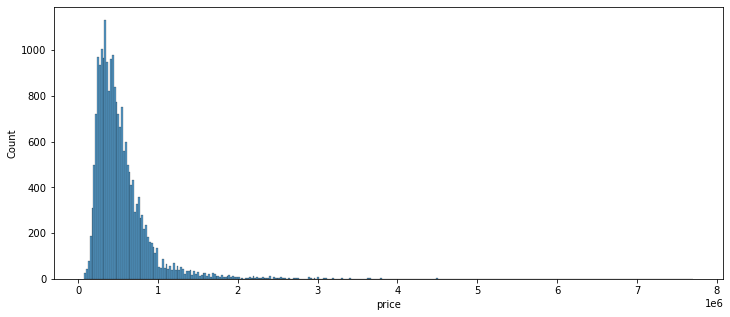

In [13]:
def plot_hist(x):
    plt.figure(figsize=(12,5))
    plt.tight_layout()
    sns.histplot(x)
    plt.show()

plot_hist(df['price'])

In [14]:
df["ln_price"] = np.log(df.price)

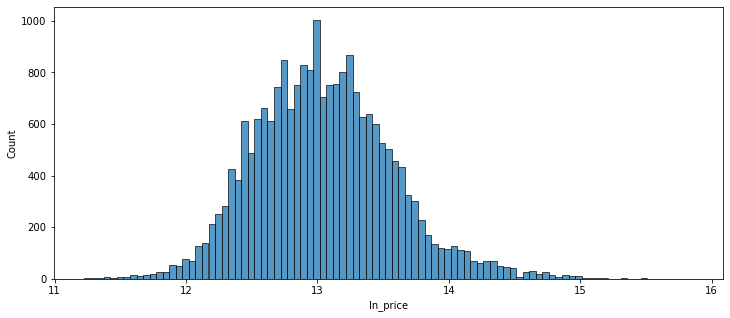

In [15]:
plot_hist(df['ln_price'])

In [16]:
# Convert logarithmic price back to actual and compare to initial price
df["price_conv"] = np.exp(df.ln_price)
df[["price", "price_conv"]].head()

,price,price_conv
0,221900.000,221900.000
1,538000.000,538000.000
2,180000.000,180000.000
3,604000.000,604000.000
4,510000.000,510000.000


In [13]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
            'waterfront', 'view','condition','grade','sqft_above','sqft_basement',
            'yr_built','yr_renovated', 'sqft_living15','sqft_lot15']

def corr_plot(mat, title='My Title', color='cividis'):
    plt.subplots(figsize=(14, 11))
    plt.title(title,fontsize=22)

    sns.heatmap(mat,linewidths=0.2,vmax=0.7,square=True,cmap=color, 
                linecolor='w',annot=True,annot_kws={'size':9},cbar_kws={'shrink': .5})


In [14]:
corr_matrix = df[features].corr()

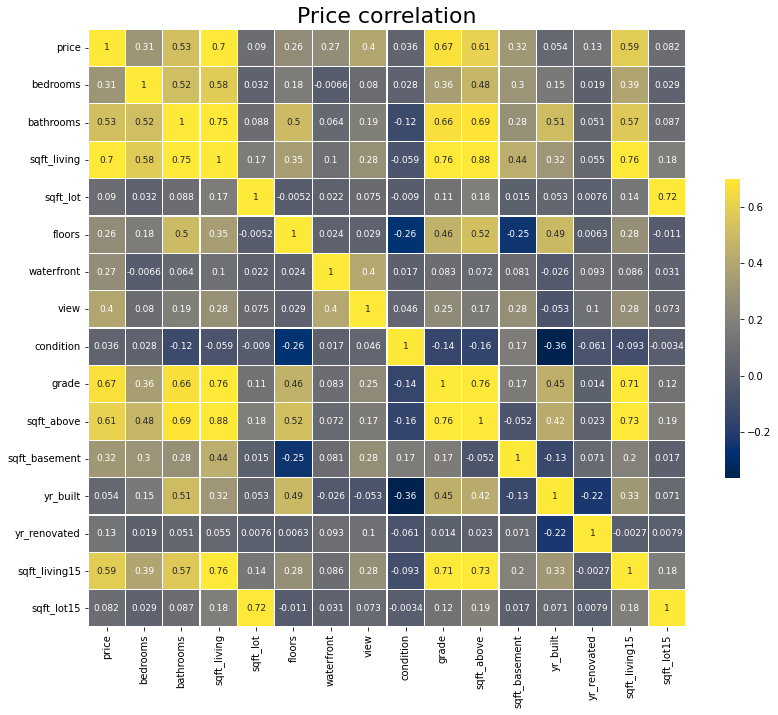

In [15]:
corr_plot(corr_matrix, "Price correlation")

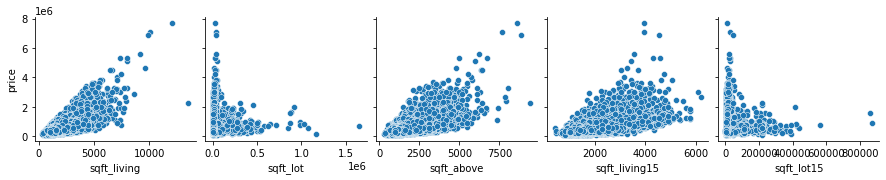

In [16]:
sns.pairplot(data=df, x_vars=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15'], y_vars=["price"])

In [17]:
y = df.price     # target, endogeneous variable, output, dependent variable
x = df[['sqft_living', 'waterfront', 'view', 'condition', 'grade']] # features, exogneous variables, inputs, independent variables

### Testing statsmodels.api

In [24]:
import statsmodels.api as sm 
x_train = sm.add_constant(x)

In [25]:
model = sm.OLS(y, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     6433.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:21:17   Log-Likelihood:            -2.9775e+05
No. Observations:               21613   AIC:                         5.955e+05
Df Residuals:                   21607   BIC:                         5.956e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.869e+05   1.63e+04    -48.239      0.000   -8.19e+05   -7.55e+05
sqft_living   161.7463      2.702     59.868      0.000     156.451     167.042
waterfront   5.927e+05      2e+04     29.650      0.000    5.53e+05    6.32e+05
view         6.679e+04   2350.920     28.410      0.000    6.22e+04    7.14e+04
condition    5.564e+04   2473.902     22.493      0.000    5.08e+04    6.05e+04
grade         1.02e+05   2112.964     48.259      0.000    9.78e+04    1.06e+05
==============================================================================
Omnibus:                    16100.917   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1035035.541
Skew:                           3.005   Prob(JB):                         0.00
Kurtosis:                      36.365   Cond. No.                     2.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation

- coef - shows the effect of feature on target (price)
- const - intercept (not meaningful in itself)
- R-squared - show what share of price variation can be explained by the mode - the bigger the value, the more predictive power model has (max at 1)

### Using sklearn

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

def rmse(y_test, y_pred):
    """root mean squared error"""
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

def mape(y_test, y_pred):
    return round(mean_absolute_percentage_error(y_test, y_pred), 3)

In [68]:
# Let's use 70% of random sample to train the model, and the remaining 30% of sample to test how good is the model
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size = 0.7, random_state=412)

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f'MAPE: {mape(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')

MAPE: 0.316
RMSE: 241825.455


### Is log-linear model better?

[Smaller error means better model]

In [69]:
y_train_log = np.log(y_train)
lr_log = LinearRegression()
reg_log = lr_log.fit(X_train, y_train_log)
y_pred_log = reg_log.predict(X_test)
y_pred_v2 = np.exp(y_pred_log)
print(f'MAPE: {mape(y_test, y_pred_v2)}')
print(f'RMSE: {rmse(y_test, y_pred_v2)}')

MAPE: 0.279
RMSE: 254445.356


### No free lunch theorem at play:

In [56]:
y_test_mean = np.mean(y_test)
idx_high_p = y_test > y_test_mean # let's create an index for houses in the test sample with prices more than the average

In [57]:
print('Model performance for expensive houses')
print(f'RMSE - log-linear model: {rmse(y_test[idx_high_p], y_pred_v2[idx_high_p])}')
print(f'RMSE - linear model:     {rmse(y_test[idx_high_p], y_pred[idx_high_p])}')
print(f'MAPE - log-linear model: {mape(y_test[idx_high_p], y_pred_v2[idx_high_p])}')
print(f'MAPE - linear model:     {mape(y_test[idx_high_p], y_pred[idx_high_p])}')

Model performance for expensive houses
RMSE - log-linear model: 392424.752
RMSE - linear model:     342566.811
MAPE - log-linear model: 0.2496341124509506
MAPE - linear model:     0.2171424623593672


In [58]:
print('Model performance for cheaper houses')
print(f'RMSE - log-linear model: {rmse(y_test[~idx_high_p], y_pred_v2[~idx_high_p])}')
print(f'RMSE - linear model:     {rmse(y_test[~idx_high_p], y_pred[~idx_high_p])}')
print(f'MAPE - log-linear model: {mape(y_test[~idx_high_p], y_pred_v2[~idx_high_p])}')
print(f'MAPE - linear model:     {mape(y_test[~idx_high_p], y_pred[~idx_high_p])}')

Model performance for cheaper houses
RMSE - log-linear model: 116021.797
RMSE - linear model:     157016.969
MAPE - log-linear model: 0.2962021446512463
MAPE - linear model:     0.37323791087617825
